In [1]:
#For data wrangling and processing
import pandas as pd
import numpy as np

#For visualtization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

#For model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#For model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

#For communication
from ipywidgets import widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams["figure.figsize"] = (16,8)

1| Load Dataset

In [2]:
df = pd.read_csv('/content/Bengaluru_House_Data (1).csv')


In [3]:

df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


2| Dataset Exploration

In [4]:
df.shape


(13320, 9)

In [5]:

area_types_count = df['area_type'].value_counts(normalize=True)


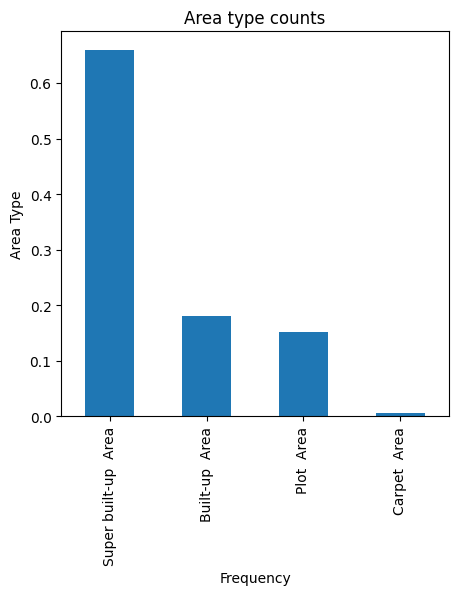

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
area_types_count.plot(kind='bar', ax=ax)
plt.ylabel('Area Type')
plt.xlabel('Frequency')
plt.title('Area type counts');

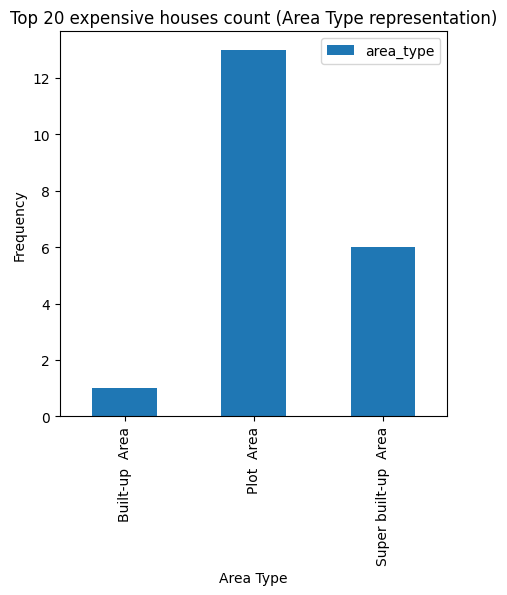

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
(
    df.sort_values(by='price', ascending=False).head(20)
    .groupby('area_type')['area_type'].count()
    .plot(kind='bar', ax=ax)
)
plt.xlabel("Area Type")
plt.ylabel("Frequency")
plt.title("Top 20 expensive houses count (Area Type representation)")
plt.legend();

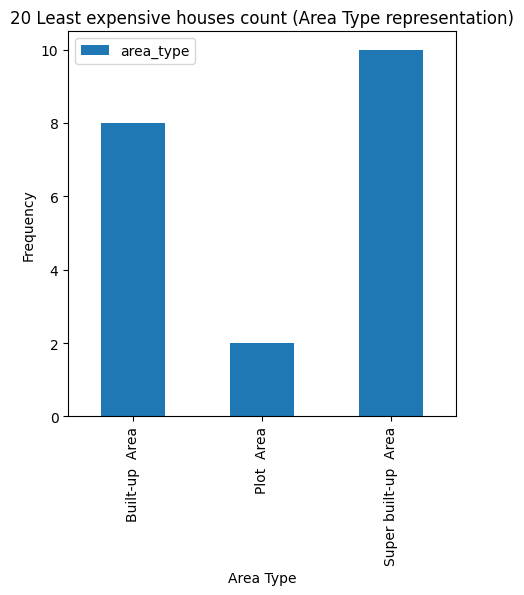

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
(
    df.sort_values(by='price', ascending=True).head(20)
    .groupby('area_type')['area_type'].count()
    .plot(kind='bar', ax=ax)
)
plt.xlabel("Area Type")
plt.ylabel("Frequency")
plt.title("20 Least expensive houses count (Area Type representation)")
plt.legend();

In [9]:
df['availability'].value_counts()

,count
availability,
Ready To Move,10581
18-Dec,307
18-May,295
18-Apr,271
18-Aug,200
...,...
16-Oct,1
17-Jan,1
16-Nov,1


In [10]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

3| Data Cleaning and Dataset Transformation

In [11]:
df.isnull().sum()


,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [12]:


numerical_features = df.select_dtypes(include=[int, float])
numerical_features.isnull().sum() > 0

,0
bath,True
balcony,True
price,False


I can fill missing values by the average as integer for these numerical features. Categorical features which are null will be deleted (dropped) from the dataset

In [13]:
numerical_features.apply(lambda x: round(np.mean(x)))



,0
bath,3
balcony,2
price,113


In [14]:
df['bath'].fillna(3, inplace=True)
df['balcony'].fillna(2, inplace=True)
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,0
balcony,0
price,0


In [15]:
df.shape

(13320, 9)

Nothing is yet removed from dataset

In [16]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
df['bhk'] = df['size'].str.split(' ', expand=True)[0]
df['bhk'] = df['bhk'].astype(float)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2.0


Now that becase bhk is exracted frin size, we can even remove this feature from dataset



In [18]:


df = df.drop(columns='size')
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200,2.0,1.0,51.00,2.0


In [19]:
df['bhk'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., nan, 27., 10.,
       19., 16., 43., 14., 12., 13., 18.])

It is time to change bhk feature datatype from object to floaT

In [20]:
df['bhk'].astype(float)

,bhk
0,2.0
1,4.0
2,3.0
3,3.0
4,2.0
...,...
13315,5.0
13316,4.0
13317,2.0
13318,4.0


We have to create new dataset that don't take into consideration entries where bhk in null

In [21]:
df_bhk = df[~df['bhk'].isnull()]
df_bhk.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200,2.0,1.0,51.00,2.0


In [22]:
df_bhk.isnull().sum()

,0
area_type,0
availability,0
location,1
society,5499
total_sqft,0
bath,0
balcony,0
price,0
bhk,0


Let me change the total_sqft data type to float

In [23]:
df_bhk[df_bhk['total_sqft'].apply(lambda x: '-' in x )].head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,LedorSa,2100 - 2850,4.0,0.0,186.000,4.0
56,Built-up Area,20-Feb,Devanahalli,BrereAt,3010 - 3410,3.0,2.0,192.000,4.0
81,Built-up Area,18-Oct,Hennur Road,Gollela,2957 - 3450,3.0,2.0,224.500,4.0
122,Super built-up Area,18-Mar,Hebbal,SNontle,3067 - 8156,4.0,0.0,477.000,4.0
137,Super built-up Area,19-Mar,8th Phase JP Nagar,Vaarech,1042 - 1105,2.0,0.0,54.005,2.0


In [24]:
# We will first need to change data type from string to float values
def convert_to_float (num):
    tokenized = num.split('-')
    if len(tokenized) == 2:
        return (float(tokenized[0]) + float(tokenized[1])) / 2
    try:
        return float(num)
    except Exception as e:
        return None
df_bhk['total_sqft'] = df_bhk['total_sqft'].apply(convert_to_float)

Let's check for 30 index which was initially has dirty total_sqft values

In [25]:
df_bhk.iloc[30]

,30
area_type,Super built-up Area
availability,19-Dec
location,Yelahanka
society,LedorSa
total_sqft,2475.0
bath,4.0
balcony,0.0
price,186.0
bhk,4.0


As of above, you can see that total_sqft is now 2475.0


When buying new house there is many features that is considered such as its location, dimension(square feet), number of rooms, architecture, bathrooms, etc.


Now we are going to look for those features against house price to check if there is a relationship.


Location vs Price

In [26]:
df_loc =df_bhk.copy()
df_loc.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200.0,2.0,1.0,51.00,2.0


In [27]:
df_loc['location'].value_counts()

,count
location,
Whitefield,539
Sarjapur Road,397
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
KAMAKIYA,1
Wheelers Road,1
MM Layout,1


It seems like location can cause high cardinality issues. It is time to check for under represented location and group them



In [28]:
less_than_10 = df_loc['location'].value_counts() < 10
less_than_10 = less_than_10[less_than_10 ]
less_than_10

,count
location,
4th Block Koramangala,True
Richmond Town,True
Kamakshipalya,True
Mathikere,True
Sector 1 HSR Layout,True
...,...
KAMAKIYA,True
Wheelers Road,True
MM Layout,True


In [29]:
df_loc['location'] = df_loc['location'].apply(lambda x: 'Other' if x in less_than_10 else x )
df_loc['location'].nunique()

254

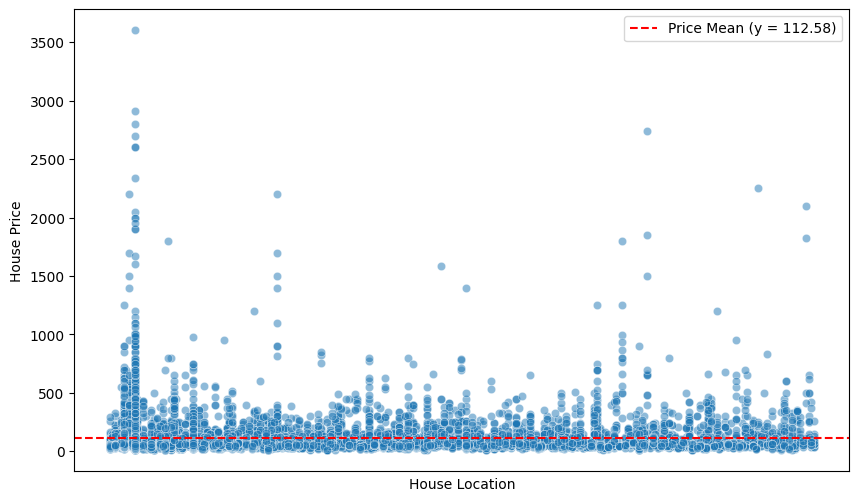

In [30]:
price_mean = df_loc['price'].mean()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='location', y='price', data=df_loc, alpha=.5)
plt.axhline(price_mean, color='red', linestyle='--', label=f'Price Mean (y = {price_mean:.2f})')
plt.ylabel('House Price')
plt.xlabel('House Location')
plt.xticks([])
plt.legend();


Most of location, houses price is less than 1000. What does this tell us?? There should be potential outliers.


Another takeway is that mean is about 112. It seems that those outliers are skewing our data.

Maybe we can exclude house with price that is above 1000. But first let me see statistical information


In [31]:

df_loc['price'].describe()

,price
count,13304.000000
mean,112.582035
std,148.988398
min,8.000000
25%,50.000000
50%,72.000000
75%,120.000000
max,3600.000000


Price vs Square FeeT

In [32]:
df_loc['price_per_sqft']  = round(df_loc['price']*100_000/df_loc['total_sqft'], 2)
df_loc.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2.0,3699.81
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4.0,4615.38
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440.0,2.0,3.0,62.00,3.0,4305.56
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3.0,6245.89
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200.0,2.0,1.0,51.00,2.0,4250.00




Let's use price per square feets to check how price is spread accross the dataset



In [33]:
# Function that formats y axis to use M for millions and K for thousands
def ticker_values_formatter(value, ticker_num):
    if value >= 1e6:
        return f'{int(value/1e6)}M'
    elif value >=1e3:
        return f'{int(value/1e3)}K'
    else:
        return f'{int(value)}'

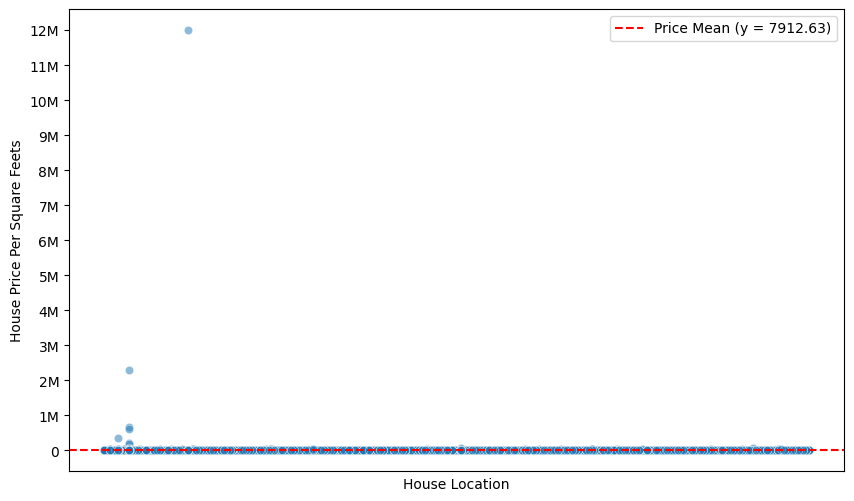

In [34]:
price_per_sqft_mean = df_loc['price_per_sqft'].mean()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='location', y='price_per_sqft', data=df_loc, alpha=.5)
plt.axhline(price_per_sqft_mean,
            color='red', linestyle='--',
            label=f'Price Mean (y = {price_per_sqft_mean:.2f})'
           )
plt.ylabel('House Price Per Square Feets')
plt.xlabel('House Location')
plt.xticks([])
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(ticker_values_formatter))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1e6))
plt.legend();

REMOVING OUTLIERS

In [35]:
df_no_extreme = df_loc.copy()
df_no_extreme.shape


(13304, 10)

In [36]:

df_cleaned_1 = df_no_extreme[df_no_extreme['price_per_sqft'] < 100_000]
df_cleaned_1.shape

(13251, 10)

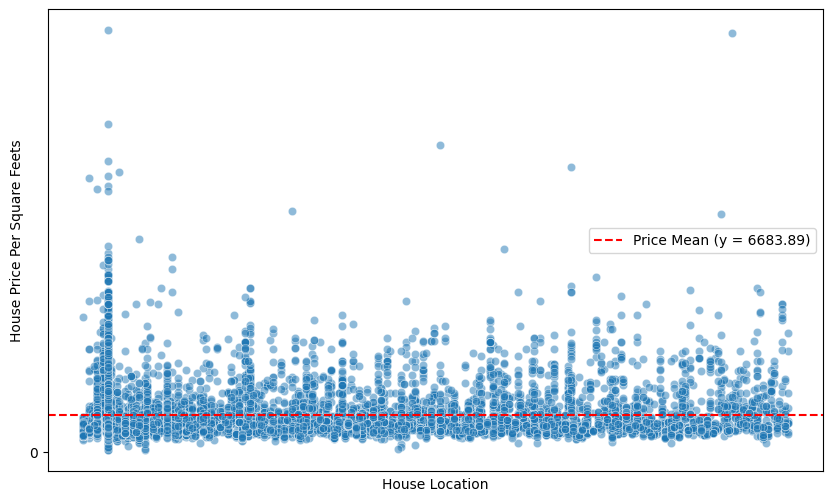

In [37]:
price_per_sqft_mean = df_cleaned_1['price_per_sqft'].mean()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='location', y='price_per_sqft', data=df_cleaned_1, alpha=.5)
plt.axhline(price_per_sqft_mean,
            color='red', linestyle='--',
            label=f'Price Mean (y = {price_per_sqft_mean:.2f})'
           )
plt.ylabel('House Price Per Square Feets')
plt.xlabel('House Location')
plt.xticks([])
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(ticker_values_formatter))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(100_000))
plt.legend();

I'm gonna remove values that fall bellow 1% and 99% percentiles

In [38]:
perc_99 = df_cleaned_1['price_per_sqft'] < np.percentile(df_cleaned_1['price_per_sqft'], 90)
perc_10 = df_cleaned_1['price_per_sqft'] > np.percentile(df_cleaned_1['price_per_sqft'], 10)
df_cleaned_2 = df_cleaned_1[perc_10 & perc_99]
df_cleaned_2.shape

(10599, 10)

(array([2128., 2365., 1977., 1421.,  995.,  624.,  360.,  236.,  274.,
         219.]),
 array([ 3500.35,  4308.21,  5116.07,  5923.93,  6731.79,  7539.65,
         8347.51,  9155.37,  9963.23, 10771.09, 11578.95]),
 <BarContainer object of 10 artists>)

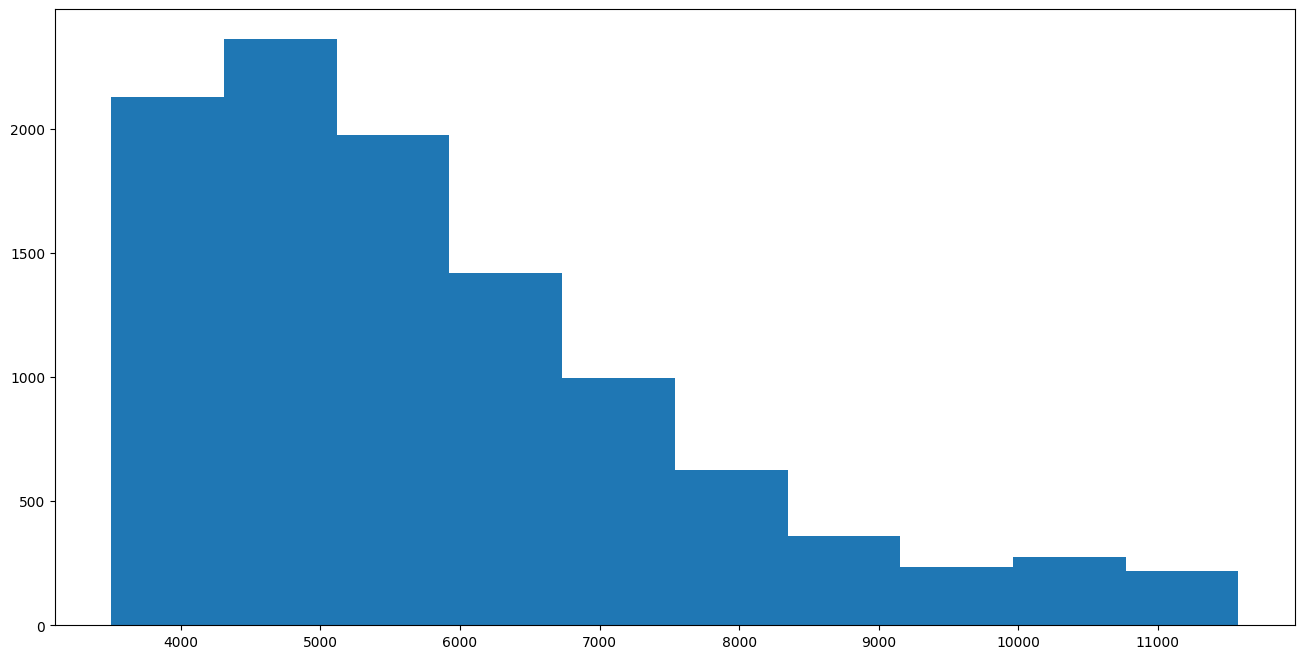

In [39]:
plt.hist(df_cleaned_2['price_per_sqft'])

We can even go deeper to what effect bhk can have to price of the house. However, I am going straing to encoding categorical features that I'll be using for model training



4 | Building and Training a Model


It's time to encode categorical features because machine learning algorithms don't cope with texts

In [40]:
categorical_feat = df_cleaned_2.select_dtypes("object").drop(['society', 'area_type', 'availability'], axis='columns').columns.to_list()
categorical_feat


['location']

In [41]:

dumies = pd.get_dummies(df_cleaned_2[categorical_feat])
dumies.head(3)

,location_ Devarachikkanahalli,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
df_cleaned_3 = (
    pd.concat(
        [
            df_cleaned_2.drop(columns=['society', 'area_type', 'availability']),
            dumies.drop('location_Other',axis = 'columns')
        ],
        axis='columns')
)
df_cleaned_3.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,location_ Devarachikkanahalli,location_1st Block Jayanagar,location_1st Block Koramangala,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.81,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.38,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.56,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.89,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.00,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
df_ready = df_cleaned_3.drop(categorical_feat, axis='columns')
df_ready.head()

,total_sqft,bath,balcony,price,bhk,price_per_sqft,location_ Devarachikkanahalli,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,1056.0,2.0,1.0,39.07,2.0,3699.81,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,3.0,120.00,4.0,4615.38,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,3.0,62.00,3.0,4305.56,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,1.0,95.00,3.0,6245.89,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,1.0,51.00,2.0,4250.00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
df_ready.select_dtypes(include=[int, float]).corr()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
total_sqft,1.000000,0.589435,0.196958,0.898251,0.544637,0.252237
bath,0.589435,1.000000,0.210857,0.579620,0.872597,0.349463
balcony,0.196958,0.210857,1.000000,0.160145,0.210573,0.014662
price,0.898251,0.579620,0.160145,1.000000,0.518536,0.594247
bhk,0.544637,0.872597,0.210573,0.518536,1.000000,0.316320
price_per_sqft,0.252237,0.349463,0.014662,0.594247,0.316320,1.000000


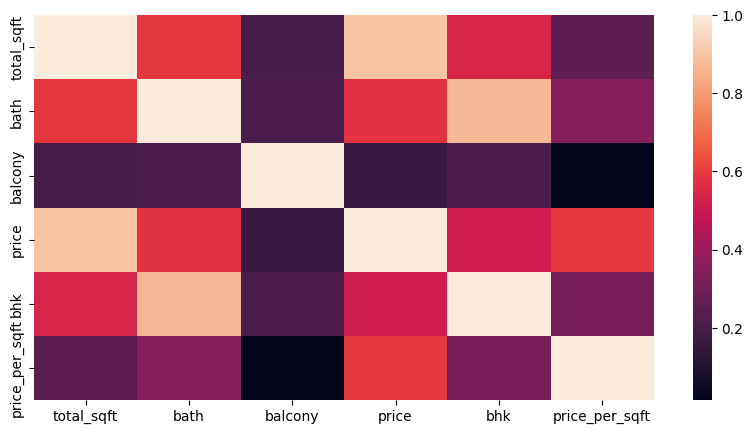

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_ready.select_dtypes(include=[int, float]).corr(), ax=ax);

In [46]:
X = df_ready.drop('price', axis='columns')
X.head()

,total_sqft,bath,balcony,bhk,price_per_sqft,location_ Devarachikkanahalli,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,1056.0,2.0,1.0,2.0,3699.81,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,3.0,4.0,4615.38,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,3.0,3.0,4305.56,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,1.0,3.0,6245.89,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,1.0,2.0,4250.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
y = df_ready['price']
y.head()

,price
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00


Building baseline

In [48]:
y_mean = round(np.mean(y), 2)
y_baseline = [y_mean] * len(y)



Now it is time to split dataset for training and testing datasets

Train Test Split


In [49]:


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)
mean_absolute_error(y, y_baseline)

45.45484857061987

Fitting Linear Regression Model


Now we have to fit the model on algorithm


In [50]:

reg_model=  LinearRegression()
#fitting the model
reg_model.fit(X_train, y_train)

LinearRegression()

In [51]:
#Check check score on training data set
train_y_pred_score = round(reg_model.score(X_train, y_train), 2)
train_y_pred_score


0.95

In [52]:

#Check check score on training data set
test_y_pred_score = round(reg_model.score(X_test, y_test), 2)
test_y_pred_score


0.97

In [53]:

reg_model.intercept_

np.float64(-100.93450451024036)

In [55]:
reg_model.coef_[:5]



array([ 0.06840132,  0.75726284,  0.67208055, -4.92810727,  0.01705293])

In [56]:
y_pred = pd.Series(reg_model.predict(X_train)).apply(lambda x: round(x, 2))
print(pd.Series(y_pred[:5]))
pd.Series(y_train[:5])

0     21.55
1     78.83
2     42.01
3     34.23
4    110.37
dtype: float64


,price
270,32.000
5914,78.650
4122,48.905
447,34.650
9241,110.000


In [57]:
round(mean_absolute_error(y_pred, y_train), 2)

8.4

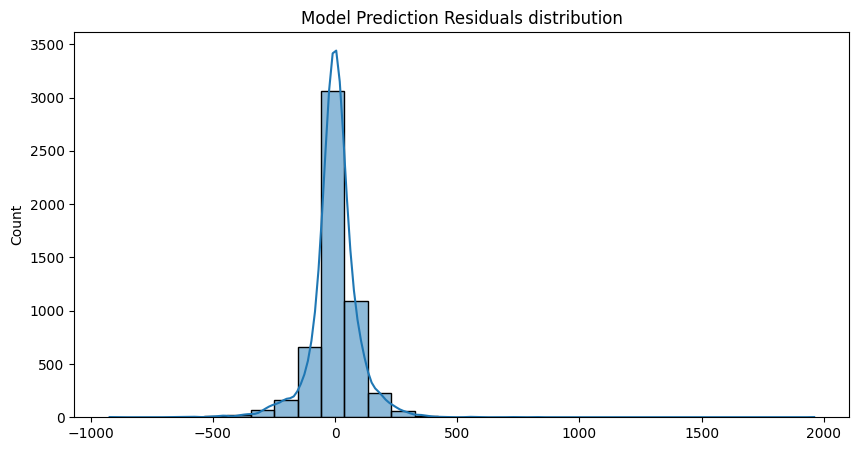

In [58]:
residuals = y_pred - y_train
fig, ax= plt.subplots(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30, ax=ax)
plt.title("Model Prediction Residuals distribution");

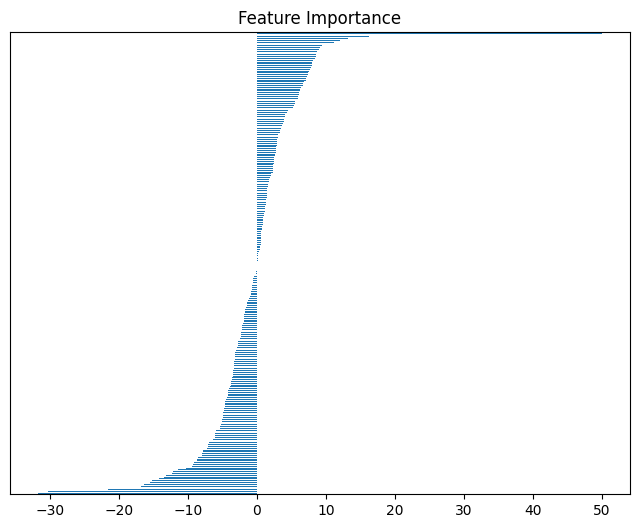

In [59]:
# For linear regression coefficients
coefficients = pd.Series(reg_model.coef_)
coefficients.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance')
plt.yticks([])
plt.show()

Let's use cross validation to check model performance. But later on, I will use Grid search validation which allows to test more than one machine learning model at time



In [60]:
cv_1 = KFold(n_splits=5, shuffle=False, random_state=None)
cv_2 = KFold(n_splits=5, shuffle=True, random_state=42)
print(f'Without shuffling: {cross_val_score(LinearRegression(), X, y, cv=cv_1)}')
print(f'With shuffling: {cross_val_score(LinearRegression(), X, y, cv=cv_2)}')

Without shuffling: [0.95514017 0.95838652 0.94547169 0.95220254 0.9545292 ]
With shuffling: [0.96326387 0.95511005 0.95122639 0.94789954 0.94583518]


In [61]:
#Using ShuffleSplit method
cv_s = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
cross_val_score(LinearRegression(), X, y, cv=cv_s)

array([0.96326387, 0.95219883, 0.95262682, 0.94162411, 0.96281787])

5 | Model Evaluation

As owner of the notebook I copied, I am going to use Grid Search technique to evaluate model on different machine learning algorithms to check which performs better.

I am going to test Ridge, Lasso, LinearRegression, and DecisionTreeRegressor.

In [62]:
def grid_search_func(X,y):
    """
    Function: grid_search_func
    This function utilize GridSearchCV to use different machine learning algorithms to check algorithm which works better.
    Parameters:
        X: Predictors
        y: target variable (to be predicted)
    Return:
        Function return data frame with three columns/feaures which are 'model', best_score, best_params'
    """
    alg_config = {
        'LinearRegression' : {
            'model' : LinearRegression(),
            'params' : {
            }
        },
        'Ridge': {
            'model': Ridge(),
            'params':{
                'alpha': [1, 2]
            }
        },
        'Lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['squared_error', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for model, config in alg_config.items():
        grid_search = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        print(grid_search)
        grid_search.fit(X,y)
        print('finished fitting the moel')
        scores.append({
            'model': model,
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [63]:
#Testing function
model_perfomance = grid_search_func(X, y)
model_perfomance

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
             estimator=LinearRegression(), param_grid={})
finished fitting the moel
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
             estimator=Ridge(), param_grid={'alpha': [1, 2]})
finished fitting the moel
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
             estimator=Lasso(),
             param_grid={'alpha': [1, 2], 'selection': ['random', 'cyclic']})
finished fitting the moel
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
             estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'splitter': ['best', 'random']})
finished fitting the moel


,model,best_score,best_params
0,LinearRegression,0.956197,{}
1,Ridge,0.956631,{'alpha': 2}
2,Lasso,0.955541,"{'alpha': 1, 'selection': 'cyclic'}"
3,decision_tree,0.961156,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [64]:
model_perfomance

,model,best_score,best_params
0,LinearRegression,0.956197,{}
1,Ridge,0.956631,{'alpha': 2}
2,Lasso,0.955541,"{'alpha': 1, 'selection': 'cyclic'}"
3,decision_tree,0.961156,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


5| COMMUNICATION


Building functin that can recieve location, square feets, bath and bhk (bedrooms, hall, kitchen) and return prediction

In [65]:
def predict_price(location):
    """
    Generate prediction of one location
    Returns turple
        index 0: prediction
        index 1: Real Value
    """
    try:
        index = np.where(X.columns==location)[0][0]
        y_pred = round(reg_model.predict(X[X.index ==index])[0], 2)
        return(f'Prediction: {y_pred}, Real value: {y[y.index ==index].to_list()[0]}')
    except Exception as e:
        return None
#Initialize output area
output = widgets.Output()
def on_dropdown_value_change(change):
    location = change['new']
    with output:
        output.clear_output()
        prediction = predict_price(location)
        output.append_display_data(display_object=prediction)
        f"Prediction for {location} is: {prediction} Price"
options = [location for location in X.columns.to_list() if location.startswith('location')]
dropdown = widgets.Dropdown(
    options=options,
    value=options[49],
    description="Location Dropdown"
)
display(dropdown, output)
#Attachhing observer function which run when value in dropdown changes
dropdown.observe(on_dropdown_value_change, names='value')

Dropdown(description='Location Dropdown', index=49, options=('location_ Devarachikkanahalli', 'location_1st Bl…

Output()